In [1]:
%load_ext rpy2.ipython

In [2]:
%%R 
library(tidyverse)
library(readxl)
library(dplyr)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Load data

The goal here is to determine the if certain environments are enriched for microcins. To do that we need information about the assemblies so that we can determine which environments they came from.


In [3]:
%%R

Australian_Dataset <- read_excel("data/Ecoli_assemblySummary.xlsx", sheet="Australian-Dataset", skip=4) %>%
    select(c("Genome_ID","Phylogroup"))%>%
	rename("phylogroup"="Phylogroup")%>%
    drop_na()

Australian_Dataset 

New names:
• `` -> `...4`
• `` -> `...13`
• `` -> `...14`
• `` -> `...22`
• `` -> `...32`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...50`
• `` -> `...57`
• `` -> `...65`
• `` -> `...71`
• `` -> `...74`
• `` -> `...75`
• `` -> `...76`
• `` -> `...80`
• `` -> `...83`
• `` -> `...84`
# A tibble: 1,294 × 2
   Genome_ID       phylogroup
   <chr>           <chr>     
 1 ESCO.0216.00064 A         
 2 ESCO.0216.00065 B2        
 3 ESCO.0216.00066 B2        
 4 ESCO.0216.00067 B2        
 5 ESCO.0216.00068 B2        
 6 ESCO.0216.00069 B2        
 7 ESCO.0216.00070 B2        
 8 ESCO.0216.00071 B1        
 9 ESCO.0216.00072 B2        
10 ESCO.0216.00073 D         
# … with 1,284 more rows
# ℹ Use `print(n = ...)` to see more rows


In [4]:
%%R

assemblySummary_SequencedGenomes <- read_excel("data/Ecoli_assemblySummary.xlsx", 
                                               sheet="Sequenced-Genomes", skip=5) %>%
	select(c("Genome_ID","Isolation source","Strain Category")) %>%
    drop_na()%>%
#Remove 'Alone' and 'Soil' samples
	filter(`Strain Category` != "Alone") %>%
	filter(`Strain Category` != "Soil")%>%
#Removing three further samples that were categorized by Touchon as Alone
    filter(Genome_ID != "ESCO.0216.00100") %>%
    filter(Genome_ID != "ESCO.0216.00262") %>%
    filter(Genome_ID != "ESCO.0216.00275") %>%
#adding in phylogenetic data from above
    full_join(Australian_Dataset, by = "Genome_ID") #%>%
#    drop_na()

assemblySummary_SequencedGenomes #has missing two

New names:
• `` -> `...8`
• `` -> `...20`
• `` -> `...28`
• `` -> `...35`
# A tibble: 1,302 × 4
   Genome_ID       `Isolation source` `Strain Category`      phylogroup
   <chr>           <chr>              <chr>                  <chr>     
 1 ESCO.0216.00064 Host-associated    Mammal_Faecal          A         
 2 ESCO.0216.00065 Environmental      Water                  B2        
 3 ESCO.0216.00066 Host-associated    Human_Extra-intestinal B2        
 4 ESCO.0216.00067 Host-associated    Human_Extra-intestinal B2        
 5 ESCO.0216.00068 Host-associated    Mammal_Faecal          B2        
 6 ESCO.0216.00069 Host-associated    Human_Extra-intestinal B2        
 7 ESCO.0216.00070 Environmental      Water                  B2        
 8 ESCO.0216.00071 Environmental      Water                  B1        
 9 ESCO.0216.00072 Host-associated    Human_Intestinal       B2        
10 ESCO.0216.00073 Host-associated    Human_Intestinal       D         
# … with 1,292 more rows
# ℹ Use `print(

In [5]:
%%R

best_hits <- read_csv("data/best_hits_Touchon2020_2022.08.15.csv")

best_hits_assemblyID <- best_hits %>%
	separate(cinful_id,c("ASSEMBLY_ACC_ID"), sep="/") %>%
	separate(ASSEMBLY_ACC_ID, c("ASSEMBLY_ACC"), sep = "[.]") %>%
    distinct(ASSEMBLY_ACC, .keep_all = TRUE)%>%
	filter(component == "microcins.verified") %>%
    filter (hmmerHit == TRUE) %>%
    drop_na()

best_hits_assemblyID #286 genomes with microcin hits

Rows: 7537 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): qseqid, sseqid, component, cinful_id, pephash, sample, contig, seq
dbl (13): pident, length, mismatch, gapopen, qstart, qend, sstart, send, eva...
lgl  (4): hmmerHit, verified, allStandardAA, signalMatch

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 286 × 25
   qseqid         sseqid pident length misma…¹ gapopen qstart  qend sstart  send
   <chr>          <chr>   <dbl>  <dbl>   <dbl>   <dbl>  <dbl> <dbl>  <dbl> <dbl>
 1 v1_PLS_db490a… H47_s…  100       75       0       0     23    97      1    75
 2 v1_PLS_db490a… H47_s…  100       75       0       0     23    97      1    75
 3 v1_PLS_db490a… H47_s…  100       75       0       0     23    97      1    75
 4 v1_PLS_db490a… H47_s…  100       75       0       0     23    97      1    75
 5 v1

In [6]:
%%R 

assemblySummary_ENAInformation <- read_excel("data/Ecoli_assemblySummary.xlsx", sheet="ENA-Information") %>%
    rename("Genome_ID" = "GEMBASE_NAME")

assemblySummary_Annotated <- assemblySummary_SequencedGenomes %>%
	right_join(assemblySummary_ENAInformation, by="Genome_ID") %>%
	drop_na()

assemblySummary_Annotated #%>% #1213 genomes
#	write_csv("data/supplemental/assemblySummary_Annotated.csv")

# A tibble: 1,213 × 9
   Genome_ID     Isola…¹ Strai…² phylo…³ ASSEM…⁴ ASSEM…⁵ STUDY…⁶ SAMPL…⁷ CONTI…⁸
   <chr>         <chr>   <chr>   <chr>   <chr>   <chr>   <chr>   <chr>   <chr>  
 1 ESCO.0216.00… Host-a… Mammal… A       M919    GCA_90… PRJEB3… ERS388… CADFUW…
 2 ESCO.0216.00… Enviro… Water   B2      E5795   GCA_90… PRJEB3… ERS388… CADFUZ…
 3 ESCO.0216.00… Host-a… Human_… B2      H219    GCA_90… PRJEB3… ERS388… CADFVP…
 4 ESCO.0216.00… Host-a… Human_… B2      H144    GCA_90… PRJEB3… ERS388… CADFVR…
 5 ESCO.0216.00… Enviro… Water   B2      E7727   GCA_90… PRJEB3… ERS388… CADFVL…
 6 ESCO.0216.00… Enviro… Water   B1      E2508   GCA_90… PRJEB3… ERS388… CADFVH…
 7 ESCO.0216.00… Host-a… Human_… B2      54_1_T… GCA_90… PRJEB3… ERS388… CADFVD…
 8 ESCO.0216.00… Host-a… Human_… D       47_4_R1 GCA_90… PRJEB3… ERS388… CADFVE…
 9 ESCO.0216.00… Host-a… Mammal… B2      M714    GCA_90… PRJEB3… ERS388… CADFVF…
10 ESCO.0216.00… Enviro… Water   B2      E7615   GCA_90… PRJEB3… ERS388… CADFVG…
# … wi

In [7]:
%%R

best_hits_assemblyID_Annotated <- best_hits_assemblyID %>% #this contains 286 microcin hits
	left_join(assemblySummary_Annotated) %>% #this contains 1213 genomes with other information
	select(ASSEMBLY_ACC, phylogroup, sseqid, verified, `Strain Category`) %>%
    drop_na(c(`Strain Category`, verified))


best_hits_assemblyID_Annotated

Joining, by = "ASSEMBLY_ACC"
# A tibble: 284 × 5
   ASSEMBLY_ACC  phylogroup sseqid                     verified Strain Categor…¹
   <chr>         <chr>      <chr>                      <lgl>    <chr>           
 1 GCA_902858915 F          H47_sp_P62530_MCHB_ECOLX   FALSE    Human_Intestinal
 2 GCA_902846155 B1         H47_sp_P62530_MCHB_ECOLX   FALSE    Human_Intestinal
 3 GCA_902849625 G          H47_sp_P62530_MCHB_ECOLX   FALSE    Human_Faecal    
 4 GCA_902840795 D          H47_sp_P62530_MCHB_ECOLX   FALSE    Mammal_Faecal   
 5 GCA_902840495 B1         H47_sp_P62530_MCHB_ECOLX   FALSE    Mammal_Faecal   
 6 GCA_902844105 A          H47_sp_P62530_MCHB_ECOLX   FALSE    Human_Faecal    
 7 GCA_902846895 B1         H47_sp_P62530_MCHB_ECOLX   FALSE    Water           
 8 GCA_902842745 B1         H47_sp_P62530_MCHB_ECOLX   FALSE    Water           
 9 GCA_902844605 A          I47_tr_Q712Q0_Q712Q0_ECOLX FALSE    Human_Extra-int…
10 GCA_902849245 G          V_sp_P22522_CEAV_ECOLX     FALSE

In [8]:
%%R

hits_phylogroup_by_category <- table(best_hits_assemblyID_Annotated$phylogroup, best_hits_assemblyID_Annotated$`Strain Category`)

table(best_hits_assemblyID_Annotated$phylogroup, best_hits_assemblyID_Annotated$`Strain Category`)

sum(table(best_hits_assemblyID_Annotated$phylogroup, best_hits_assemblyID_Annotated$`Strain Category`))

[1] 284


In [9]:
%%R

all_phylogroup_by_category <- table(assemblySummary_Annotated$phylogroup, assemblySummary_Annotated$`Strain Category`)

table(assemblySummary_Annotated$phylogroup, assemblySummary_Annotated$`Strain Category`)

    
     Bird_Faecal Human_Extra-intestinal Human_Faecal Human_Intestinal
  A           51                     19           35               20
  B1          46                      1            0               28
  B2          31                     64           22               73
  C            1                      5            4                1
  D           29                      0            0               44
  E            8                      0            0                1
  F           17                     13            7                5
  G            2                      2            4                0
    
     Mammal_Faecal Poultry_Meat Water
  A             21           89    56
  B1            27           48   123
  B2            35           37    38
  C              0            4     1
  D             27           43    31
  E              4           28    15
  F              3           17     9
  G              0           17     7


In [10]:
%%R

#Frequency of microcin per assembly
microcinAssemblyProportion <- length(best_hits_assemblyID_Annotated$ASSEMBLY_ACC)/length(assemblySummary_Annotated$ASSEMBLY_ACC)

print(length(best_hits_assemblyID_Annotated$ASSEMBLY_ACC))
print("/")
print(length(assemblySummary_Annotated$ASSEMBLY_ACC))
print("=")
print(microcinAssemblyProportion)


[1] 284
[1] "/"
[1] 1213
[1] "="
[1] 0.2341303


In [11]:
%%R
strain_category_assemblies <- assemblySummary_Annotated %>%
	count(`Strain Category`, name="total_assemblies")
strain_category_assemblies

# A tibble: 7 × 2
  `Strain Category`      total_assemblies
  <chr>                             <int>
1 Bird_Faecal                         185
2 Human_Extra-intestinal              104
3 Human_Faecal                         72
4 Human_Intestinal                    172
5 Mammal_Faecal                       117
6 Poultry_Meat                        283
7 Water                               280


In [12]:
%%R -w 1500

microcin_strain_category <- best_hits_assemblyID_Annotated %>%
	count(`Strain Category`, name = "microcin") %>%
	full_join(strain_category_assemblies) %>%
	mutate(relative_microcin = microcin / total_assemblies) %>%
	mutate(odds = relative_microcin/(microcinAssemblyProportion)) %>%
	mutate(LOE = log10(odds)) %>%
	drop_na() 
#microcin_strain_category <- microcin_strain_category %>%
#	mutate(assembly_freq = total_assemblies#/sum(total_assemblies)

microcin_strain_category


Joining, by = "Strain Category"
# A tibble: 7 × 6
  `Strain Category`      microcin total_assemblies relative_mic…¹  odds      LOE
  <chr>                     <int>            <int>          <dbl> <dbl>    <dbl>
1 Bird_Faecal                  42              185         0.227  0.970 -0.0134 
2 Human_Extra-intestinal       46              104         0.442  1.89   0.276  
3 Human_Faecal                 17               72         0.236  1.01   0.00366
4 Human_Intestinal             33              172         0.192  0.819 -0.0865 
5 Mammal_Faecal                26              117         0.222  0.949 -0.0227 
6 Poultry_Meat                 94              283         0.332  1.42   0.152  
7 Water                        26              280         0.0929 0.397 -0.402  
# … with abbreviated variable name ¹​relative_microcin


In [13]:
%%R
#Chi square present in paper before figure 5

microcin_strain_category_chisq <- chisq.test(microcin_strain_category$total_assemblies)
microcin_strain_category_chisq


	Chi-squared test for given probabilities

data:  microcin_strain_category$total_assemblies
X-squared = 241.17, df = 6, p-value < 2.2e-16



In [14]:
%%R

freqs = microcin_strain_category$total_assemblies/sum(microcin_strain_category$total_assemblies)

microcin_strain_category_freq_chisq <- chisq.test(x = microcin_strain_category$microcin, p=freqs)

microcin_strain_category_freq_chisq


	Chi-squared test for given probabilities

data:  microcin_strain_category$microcin
X-squared = 56.158, df = 6, p-value = 2.705e-10



In [15]:
%%R
microcin_strain_category #<- microcin_strain_category %>%
microcin_strain_category$`Strain Category` <- c("Bird Fecal", "Human Extraintestinal", "Human Fecal", "Human Intestinal", "Mammal Fecal", "Poultry Meat", "Water")

#	write_csv("data/supplemental/Touchon_categories_microcins.csv")

microcin_strain_category %>%
    bind_rows(summarise_all(., ~if(is.numeric(.)) sum(.) else "Total"))



# A tibble: 8 × 6
  `Strain Category`     microcin total_assemblies relative_micr…¹  odds      LOE
  <chr>                    <int>            <int>           <dbl> <dbl>    <dbl>
1 Bird Fecal                  42              185          0.227  0.970 -0.0134 
2 Human Extraintestinal       46              104          0.442  1.89   0.276  
3 Human Fecal                 17               72          0.236  1.01   0.00366
4 Human Intestinal            33              172          0.192  0.819 -0.0865 
5 Mammal Fecal                26              117          0.222  0.949 -0.0227 
6 Poultry Meat                94              283          0.332  1.42   0.152  
7 Water                       26              280          0.0929 0.397 -0.402  
8 Total                      284             1213          1.74   7.45  -0.0924 
# … with abbreviated variable name ¹​relative_microcin


In [16]:
%%R

touchon <- microcin_strain_category %>%
    select(c(`Strain Category`,total_assemblies,microcin)) %>%
	rename("group"="Strain Category") %>%
	rename("samples"="total_assemblies") %>%
	rename("hits"="microcin")

samples_tot <- sum(touchon$samples)
hits_tot <- sum(touchon$hits)

fisher_results <- touchon %>%
  mutate(
    fit = map2(
      samples, hits,
      ~fisher.test(cbind(c(samples_tot, .x), c(hits_tot, .y)))
    ),
    glance_out = map(fit, glance)
  ) %>%
  select(group, glance_out) %>%
  unnest(cols = glance_out) %>%
  mutate(
    # adjust for multiple testing
    p.adj = p.adjust(p.value, method = "fdr"),
    # sort
    group = fct_reorder(group, estimate),
    # significance label
    label = case_when(
      p.adj < 0.001 ~ "***",
      p.adj < 0.01 ~ "**",
      p.adj < 0.05 ~ "*",
      TRUE ~ ""
    ),
    # for label justification
    hjust = ifelse(estimate < 1, 1.1, -0.1)
  ) %>%
  rename(
    odds_ratio = estimate
  )

fisher_results

# A tibble: 7 × 10
  group       odds_…¹ p.value conf.…² conf.…³ method alter…⁴   p.adj label hjust
  <fct>         <dbl>   <dbl>   <dbl>   <dbl> <chr>  <chr>     <dbl> <chr> <dbl>
1 Bird Fecal    0.970 9.28e-1   0.660   1.40  Fishe… two.si… 1   e+0 ""      1.1
2 Human Extr…   1.89  1.22e-3   1.27    2.77  Fishe… two.si… 4.28e-3 "**"   -0.1
3 Human Fecal   1.01  1   e+0   0.548   1.76  Fishe… two.si… 1   e+0 ""     -0.1
4 Human Inte…   0.820 3.41e-1   0.535   1.23  Fishe… two.si… 5.96e-1 ""      1.1
5 Mammal Fec…   0.949 9.11e-1   0.584   1.49  Fishe… two.si… 1   e+0 ""      1.1
6 Poultry Me…   1.42  1.19e-2   1.07    1.86  Fishe… two.si… 2.77e-2 "*"    -0.1
7 Water         0.397 2.83e-6   0.250   0.608 Fishe… two.si… 1.98e-5 "***"   1.1
# … with abbreviated variable names ¹​odds_ratio, ²​conf.low, ³​conf.high,
#   ⁴​alternative


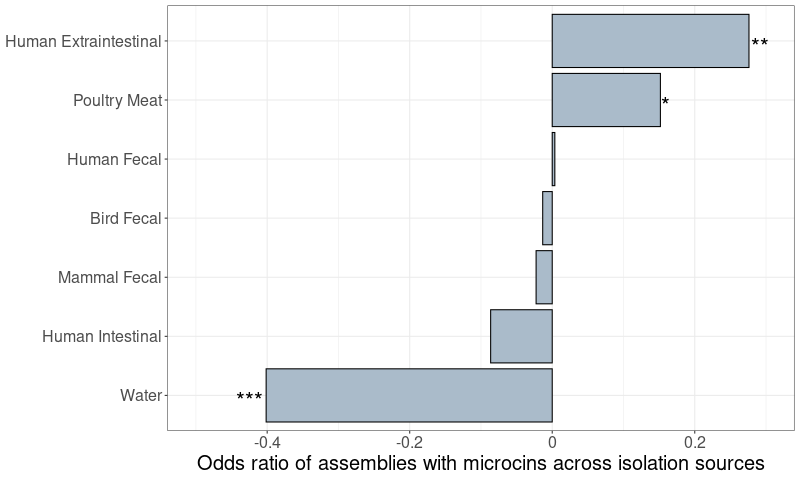

In [21]:
%%R -w 800

ggplot(fisher_results, aes(x = odds_ratio, y = reorder(group, odds_ratio)), log="x") +
    geom_col() +
    geom_text(aes(label = label, hjust = hjust), size = 8, vjust = 0.8) +
    scale_x_log10(
        limits = c(10^-0.5, 10^0.3),
        breaks = scales::trans_breaks("log10", function(x) 10^x),
        labels = scales::trans_format("log10", scales::math_format(.x))
                )+
    geom_bar(stat = "identity", position = "identity", fill = "#aabbcaff", color="black") +
        ylab(NULL) + 
        xlab("Odds ratio of assemblies with microcins across isolation sources") +
        theme_bw() +
        theme(text = element_text(size = 20))

#ggsave("plots/05_ecoli_microcin_environment_updated_hmm_final.svg")